# Violin Plot

Quantitaive variable vs Qualitative variable

It is basically a "smoothed histogram" density turned on teh side. The shape of the crve indicates the number of data points in that area

Jittered scatter plot vs violin plot:
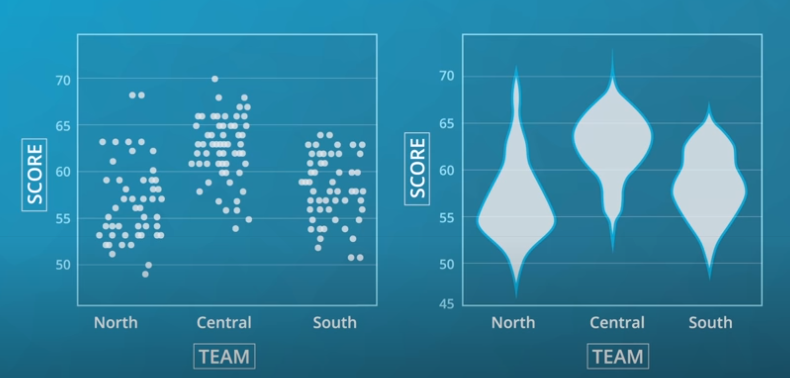

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

In [2]:
fuel_econ = pd.read_csv("fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(4)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


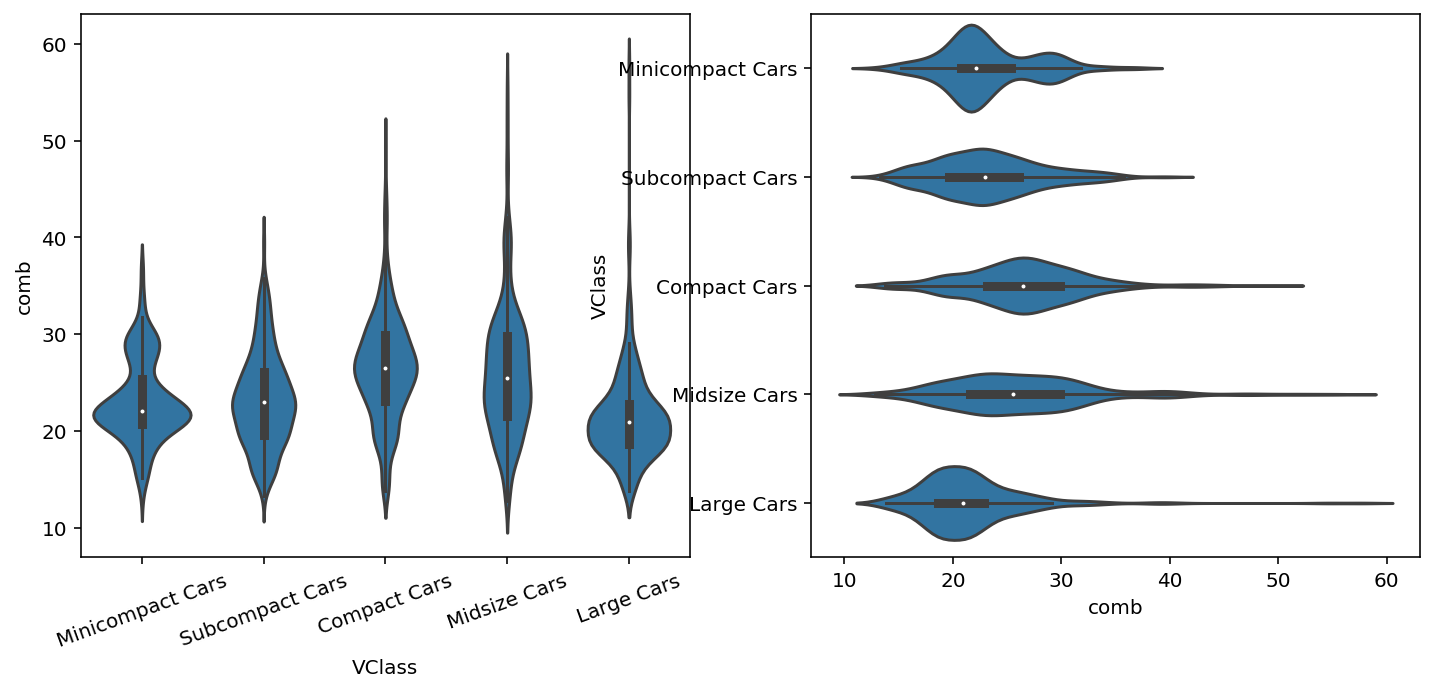

In [18]:
# Order the display variables
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

fig = plt.figure(figsize=[12,5])
# Violin plot 
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', 
              color=base_color)
plt.xticks(rotation=20)

# Horizontal violin plot
plt.subplot(1,2,2)
sb.violinplot(data=fuel_econ, y='VClass', x='comb', 
              color=base_color)

Observations: 
* Large cars: have lowest fuel efficiency
* they have long tails, which means lots of outliers 
* inner=None; will turn off the boxplots inside

# Box Plot

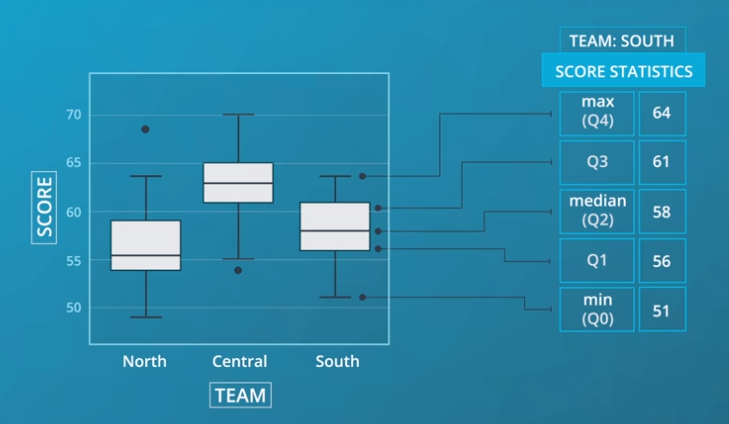

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

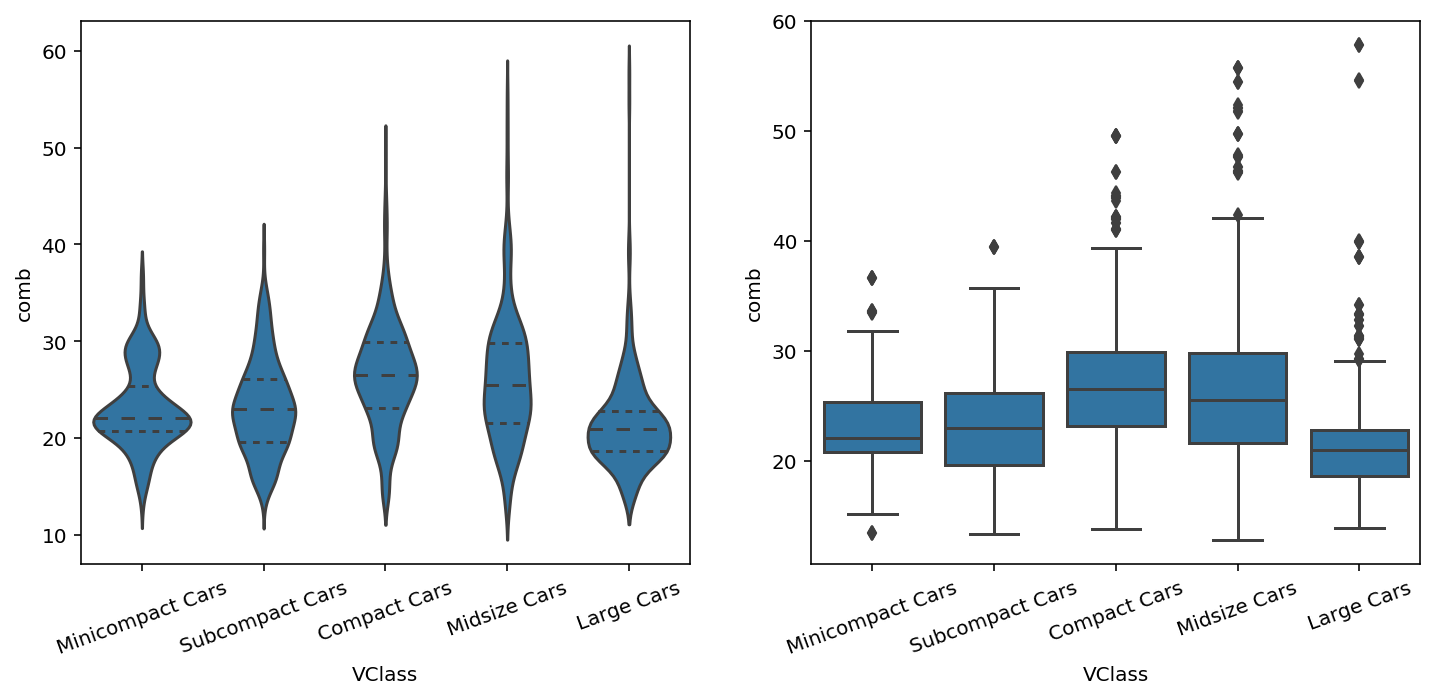

In [23]:
fig = plt.figure(figsize=[12,5])
# Violin plot 
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', 
              color=base_color, inner='quartile')
plt.xticks(rotation=20)

# Horizontal violin plot
plt.subplot(1,2,2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', 
              color=base_color)
plt.xticks(rotation=20)

### Interpreting a box plot

* 99% of area under the cureve is covered between median + or - 3\*sigma 
* This marks the min and max values of the data (lowest and hight observation) as whisker end points. These are called the **"fence"**
* fence / whisker ends are marked at **1.5 \* IQR**
* any value outside this fence is called an **outlier**

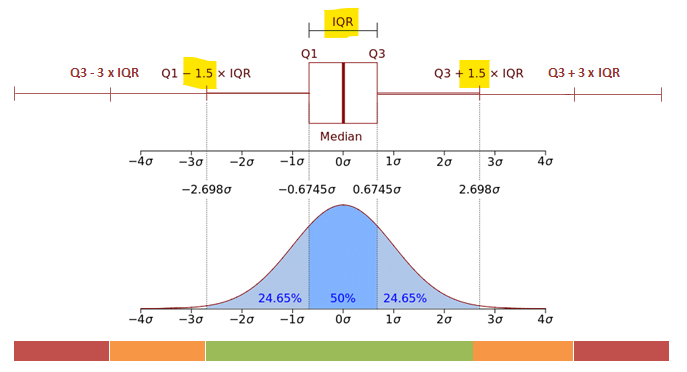

In [25]:
(0.6745*2)+1.5

2.849